In [1]:
import pandas as pd
import xlrd

In [2]:
file_path = 'Credit Banking_Project1.xls'
sheets_to_import = ['Customer Acqusition', 'Spend', 'Repayment']  # or [0, 1, 2] for sheet indices
df_dict = pd.read_excel(file_path, sheet_name=sheets_to_import)




In [3]:
Cust_acqu= df_dict['Customer Acqusition']

In [4]:
Cust_acqu.head()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,11.559307,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary


In [5]:
spend=df_dict['Spend']

In [6]:
spend.head()

,Sl No:,Costomer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,473775.834869
1,2,A1,2004-01-03,PETRO,335578.666019
2,3,A1,2004-01-15,CLOTHES,371040.941912
3,4,A1,2004-01-25,FOOD,141177.813256
4,5,A1,2005-01-17,CAMERA,398403.771812


In [7]:
repayment = df_dict['Repayment']

In [8]:
repayment.head()

,SL No:,Costomer,Month,Amount
0,1,A1,2004-01-12,331844.007374
1,2,A1,2004-01-03,441139.807335
2,3,A1,2004-01-15,32480.004009
3,4,A1,2004-01-25,90636.966534
4,5,A1,2005-01-17,1581.969829


In [9]:
Cust_acqu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl No:               100 non-null    int64  
 1   Customer             100 non-null    object 
 2   Age                  100 non-null    float64
 3   City                 100 non-null    object 
 4   Credit Card Product  100 non-null    object 
 5   Limit                100 non-null    int64  
 6   Company              100 non-null    object 
 7   Segment              100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [10]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Costomer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [11]:
spend['Type'].unique()

array(['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA', 'SANDALS',
       'CAR', 'BIKE', 'AUTO', 'SHOPPING', 'AIR TICKET', 'BUS TICKET',
       'TRAIN TICKET', 'RENTAL', 'MOVIE TICKET'], dtype=object)

In [12]:
category_mapping = {
    'JEWELLERY': 'Luxury',
    'PETRO': 'Transportation',
    'CLOTHES': 'Apparel',
    'FOOD': 'Food & Dining',
    'CAMERA': 'Electronics',
    'SANDALS': 'Apparel',
    'CAR': 'Transportation',
    'BIKE': 'Transportation',
    'AUTO': 'Transportation',
    'SHOPPING': 'Retail',
    'AIR TICKET': 'Travel',
    'BUS TICKET': 'Travel',
    'TRAIN TICKET': 'Travel',
    'RENTAL': 'Housing',
    'MOVIE TICKET': 'Entertainment'
}

spend['Category'] = spend['Type'].map(category_mapping)

In [63]:
category_mapping

{'JEWELLERY': 'Luxury',
 'PETRO': 'Transportation',
 'CLOTHES': 'Apparel',
 'FOOD': 'Food & Dining',
 'CAMERA': 'Electronics',
 'SANDALS': 'Apparel',
 'CAR': 'Transportation',
 'BIKE': 'Transportation',
 'AUTO': 'Transportation',
 'SHOPPING': 'Retail',
 'AIR TICKET': 'Travel',
 'BUS TICKET': 'Travel',
 'TRAIN TICKET': 'Travel',
 'RENTAL': 'Housing',
 'MOVIE TICKET': 'Entertainment'}

In [13]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1500 non-null   int64         
 1   Costomer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 47.0+ KB


# Tasks


 Provide a meaningful treatment to all values where age is less than 18.

as 18 + can only have credit card that depicts faulty entries which can be replaced by mean age for best fits.

In [14]:
mean_age = Cust_acqu['Age'].mean()

In [15]:
Cust_acqu.loc[Cust_acqu['Age'] < 18, 'Age'] = mean_age

In [16]:
Cust_acqu

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,40.146505,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,40.146505,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,29.631637,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,20.611833,TRIVANDRUM,Platimum,10000,C20,Govt
97,98,A98,40.538985,CALCUTTA,Platimum,10001,C21,Normal Salary
98,99,A99,21.588666,CALCUTTA,Platimum,10002,C22,Self Employed


In [17]:
monthly_spend_table = spend.pivot_table(index='Costomer', columns='Month', values='Amount', aggfunc='sum')
monthly_spend_table.columns = pd.to_datetime(monthly_spend_table.columns).to_period('M')
monthly_spend_table = monthly_spend_table.groupby(pd.PeriodIndex(monthly_spend_table.columns, freq='M'), axis=1).sum()


In [18]:
monthly_spend_table

Month,2004-01,2004-02,2004-03,2004-04,2004-05,2004-09,2004-11,2005-01,2005-02,2005-04,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
Costomer,,,,,,,,,,,,,,,,,,,,,
A1,1.511173e+06,41381.105869,0.000000,0.000000,131196.587818,0.000000,0.0,398403.771812,1.404193e+06,0.000000,...,0.000000,564506.856942,0.000000,0.00000,0.000000,0.000000,0.000000,220735.008802,0.000000,0.0
A10,7.474281e+05,0.000000,435158.556477,0.000000,480728.812599,0.000000,0.0,0.000000,3.573965e+05,0.000000,...,233741.358672,60212.901110,117295.634416,0.00000,267436.935766,230894.421788,0.000000,0.000000,0.000000,0.0
A100,4.225419e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A11,8.195447e+05,501940.267611,0.000000,493104.170675,0.000000,0.000000,0.0,0.000000,4.926942e+05,0.000000,...,148870.341887,0.000000,103939.838043,462784.63745,0.000000,0.000000,92870.552442,0.000000,261661.516869,0.0
A12,7.449706e+05,414392.062847,0.000000,0.000000,0.000000,190052.909481,0.0,287857.061186,1.208185e+06,524412.230961,...,877581.907941,179584.623582,0.000000,0.00000,133726.622276,347129.209178,0.000000,86873.259796,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A95,3.478339e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A96,3.203635e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A97,1.643300e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [19]:

merged_table1 = Cust_acqu.merge(monthly_spend_table, left_on='Customer', right_on='Costomer')


In [20]:
merged_table1.head()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment,2004-01,2004-02,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
0,1,A1,40.146505,BANGALORE,Gold,500000,C1,Self Employed,1.511173e+06,41381.105869,...,0.000000e+00,564506.856942,0.000000,0.0,0.0,0.0,0.0,220735.008802,0.000000,0.000000
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC,7.352638e+05,0.000000,...,0.000000e+00,126060.878523,442880.889524,0.0,0.0,0.0,0.0,0.000000,73294.492713,0.000000
2,3,A3,40.146505,COCHIN,Platimum,10000,C3,Salaried_Pvt,6.472166e+05,0.000000,...,1.815547e+04,67040.745163,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,411958.863899
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt,1.103216e+06,0.000000,...,4.246472e+05,0.000000,332272.737406,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary,8.619676e+05,0.000000,...,1.175483e+06,777255.874478,204841.125102,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [21]:
monthly_spend_table

Month,2004-01,2004-02,2004-03,2004-04,2004-05,2004-09,2004-11,2005-01,2005-02,2005-04,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
Costomer,,,,,,,,,,,,,,,,,,,,,
A1,1.511173e+06,41381.105869,0.000000,0.000000,131196.587818,0.000000,0.0,398403.771812,1.404193e+06,0.000000,...,0.000000,564506.856942,0.000000,0.00000,0.000000,0.000000,0.000000,220735.008802,0.000000,0.0
A10,7.474281e+05,0.000000,435158.556477,0.000000,480728.812599,0.000000,0.0,0.000000,3.573965e+05,0.000000,...,233741.358672,60212.901110,117295.634416,0.00000,267436.935766,230894.421788,0.000000,0.000000,0.000000,0.0
A100,4.225419e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A11,8.195447e+05,501940.267611,0.000000,493104.170675,0.000000,0.000000,0.0,0.000000,4.926942e+05,0.000000,...,148870.341887,0.000000,103939.838043,462784.63745,0.000000,0.000000,92870.552442,0.000000,261661.516869,0.0
A12,7.449706e+05,414392.062847,0.000000,0.000000,0.000000,190052.909481,0.0,287857.061186,1.208185e+06,524412.230961,...,877581.907941,179584.623582,0.000000,0.00000,133726.622276,347129.209178,0.000000,86873.259796,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A95,3.478339e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A96,3.203635e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
A97,1.643300e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [22]:
monthly_spend_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, A1 to A99
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2004-01  100 non-null    float64
 1   2004-02  100 non-null    float64
 2   2004-03  100 non-null    float64
 3   2004-04  100 non-null    float64
 4   2004-05  100 non-null    float64
 5   2004-09  100 non-null    float64
 6   2004-11  100 non-null    float64
 7   2005-01  100 non-null    float64
 8   2005-02  100 non-null    float64
 9   2005-04  100 non-null    float64
 10  2005-05  100 non-null    float64
 11  2005-06  100 non-null    float64
 12  2005-07  100 non-null    float64
 13  2005-08  100 non-null    float64
 14  2005-09  100 non-null    float64
 15  2005-10  100 non-null    float64
 16  2005-11  100 non-null    float64
 17  2005-12  100 non-null    float64
 18  2006-01  100 non-null    float64
 19  2006-02  100 non-null    float64
 20  2006-03  100 non-null    float64
 21  2006-04  100 non-nul

In [23]:
monthly_repayment_table = repayment.pivot_table(index='Costomer', columns='Month', values='Amount', aggfunc='sum')
monthly_repayment_table.columns = pd.to_datetime(monthly_repayment_table.columns).to_period('M')
monthly_repayment_table = monthly_repayment_table.groupby(pd.PeriodIndex(monthly_repayment_table.columns, freq='M'), axis=1).sum()



In [24]:
monthly_repayment_table.head()

Month,2004-01,2004-02,2004-03,2004-04,2004-05,2004-09,2004-11,2005-01,2005-02,2005-04,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
Costomer,,,,,,,,,,,,,,,,,,,,,
A1,1.362775e+06,191180.011618,0.00000,0.000000,0.0,0.00000,0.0,1581.969829,1.199808e+06,0.000000,...,0.000000,3.712733e+05,0.000000,0.000000,0.000000,0.0,108320.120547,0.000000,17931.399287,0.0
A10,1.149997e+06,0.000000,266929.37848,0.000000,0.0,0.00000,0.0,446068.328546,9.101423e+05,279491.614749,...,125956.719043,4.301121e+05,298502.782869,0.000000,427415.084686,0.0,0.000000,0.000000,0.000000,0.0
A100,1.511414e+05,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
A11,1.052386e+06,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.000000,1.106038e+06,0.000000,...,160690.212511,1.135005e+06,424846.394866,0.000000,54897.907189,0.0,0.000000,0.000000,0.000000,0.0
A12,3.686586e+05,243130.400164,0.00000,397648.559664,0.0,258170.49203,0.0,29185.273687,1.059845e+06,328164.547294,...,955025.272271,0.000000e+00,418624.512221,451548.900409,594688.682824,0.0,0.000000,439421.565719,0.000000,0.0


In [25]:
merged_table2 = Cust_acqu.merge(monthly_repayment_table, left_on='Customer', right_on='Costomer')

In [26]:
merged_table2

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment,2004-01,2004-02,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
0,1,A1,40.146505,BANGALORE,Gold,500000,C1,Self Employed,1.362775e+06,191180.011618,...,0.000000,371273.274356,0.000000,0.0,0.0,0.0,108320.120547,0.000000,17931.399287,0.000000
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC,6.640794e+05,0.000000,...,0.000000,346376.739887,0.000000,0.0,0.0,0.0,0.000000,414752.806035,0.000000,0.000000
2,3,A3,40.146505,COCHIN,Platimum,10000,C3,Salaried_Pvt,1.347209e+05,0.000000,...,0.000000,315238.808163,0.000000,0.0,0.0,0.0,0.000000,0.000000,329095.557929,0.000000
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt,2.499316e+05,0.000000,...,181662.295322,493715.411070,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,196563.755841
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary,1.802039e+06,0.000000,...,970251.074025,0.000000,169470.256462,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,A96,29.631637,CHENNAI,Silver,100000,C19,Salaried_Pvt,1.101390e+05,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
96,97,A97,20.611833,TRIVANDRUM,Platimum,10000,C20,Govt,1.746064e+05,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
97,98,A98,40.538985,CALCUTTA,Platimum,10001,C21,Normal Salary,9.780260e+04,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
98,99,A99,21.588666,CALCUTTA,Platimum,10002,C22,Self Employed,3.585899e+05,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [27]:
monthly_repayment_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, A1 to A99
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2004-01  100 non-null    float64
 1   2004-02  100 non-null    float64
 2   2004-03  100 non-null    float64
 3   2004-04  100 non-null    float64
 4   2004-05  100 non-null    float64
 5   2004-09  100 non-null    float64
 6   2004-11  100 non-null    float64
 7   2005-01  100 non-null    float64
 8   2005-02  100 non-null    float64
 9   2005-04  100 non-null    float64
 10  2005-05  100 non-null    float64
 11  2005-06  100 non-null    float64
 12  2005-07  100 non-null    float64
 13  2005-08  100 non-null    float64
 14  2005-09  100 non-null    float64
 15  2005-10  100 non-null    float64
 16  2005-11  100 non-null    float64
 17  2005-12  100 non-null    float64
 18  2006-01  100 non-null    float64
 19  2006-02  100 non-null    float64
 20  2006-03  100 non-null    float64
 21  2006-04  100 non-nul

In [28]:
surplus_amount = monthly_repayment_table.subtract(monthly_spend_table, fill_value=0)
positive_surplus_amount = surplus_amount[surplus_amount > 0]

cashback = positive_surplus_amount + (0.02 * positive_surplus_amount)
cashback_shifted = cashback.shift(1, axis=1)

cashback_table = pd.DataFrame(cashback_shifted)

In [29]:
cashback_table.head()

Month,2004-01,2004-02,2004-03,2004-04,2004-05,2004-09,2004-11,2005-01,2005-02,2005-04,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
Costomer,,,,,,,,,,,,,,,,,,,,,
A1,NaN,NaN,152794.883864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110486.522958,NaN,18290.027272
A10,NaN,410620.371544,NaN,NaN,NaN,NaN,NaN,NaN,454989.695117,563800.747938,...,NaN,NaN,3.772972e+05,184831.291421,NaN,163177.711898,NaN,NaN,NaN,NaN
A100,NaN,111064.944449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A11,NaN,237498.420009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,625610.776316,...,NaN,12056.268037,1.157705e+06,327324.687960,NaN,55995.865333,NaN,NaN,NaN,NaN
A12,NaN,NaN,NaN,NaN,405601.530858,NaN,69479.9342,NaN,NaN,NaN,...,NaN,78992.231617,NaN,426997.002465,460579.878417,470181.301758,NaN,NaN,359599.272041,NaN


In [30]:
cashback_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, A1 to A99
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2004-01  0 non-null      float64
 1   2004-02  30 non-null     float64
 2   2004-03  17 non-null     float64
 3   2004-04  10 non-null     float64
 4   2004-05  17 non-null     float64
 5   2004-09  16 non-null     float64
 6   2004-11  13 non-null     float64
 7   2005-01  10 non-null     float64
 8   2005-02  18 non-null     float64
 9   2005-04  37 non-null     float64
 10  2005-05  19 non-null     float64
 11  2005-06  31 non-null     float64
 12  2005-07  13 non-null     float64
 13  2005-08  9 non-null      float64
 14  2005-09  24 non-null     float64
 15  2005-10  8 non-null      float64
 16  2005-11  10 non-null     float64
 17  2005-12  21 non-null     float64
 18  2006-01  10 non-null     float64
 19  2006-02  9 non-null      float64
 20  2006-03  22 non-null     float64
 21  2006-04  32 non-null

In [31]:
negative_surplus_amount = surplus_amount[surplus_amount < 0]

fine = negative_surplus_amount.abs() + (0.029 * negative_surplus_amount.abs())
fine_shifted = fine.shift(1, axis=1)

fine_table = pd.DataFrame(fine_shifted)

In [32]:
fine_table.head()

Month,2004-01,2004-02,2004-03,2004-04,2004-05,2004-09,2004-11,2005-01,2005-02,2005-04,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
Costomer,,,,,,,,,,,,,,,,,,,,,
A1,NaN,152701.038984,NaN,NaN,NaN,135001.288865,NaN,NaN,408329.634241,210312.594479,...,NaN,NaN,198837.356482,NaN,NaN,NaN,NaN,NaN,227136.324058,NaN
A10,NaN,NaN,NaN,173107.824159,NaN,494669.948165,NaN,NaN,NaN,NaN,...,NaN,110910.394179,NaN,NaN,NaN,NaN,237590.360020,NaN,NaN,NaN
A100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A11,NaN,NaN,516496.535372,NaN,507404.191624,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,476205.391936,NaN,NaN,95563.798463,NaN,269249.700859
A12,NaN,387224.992871,176228.250901,NaN,NaN,NaN,NaN,NaN,266173.269336,152642.218545,...,NaN,NaN,184792.577666,NaN,NaN,NaN,357195.956244,NaN,NaN,NaN


In [34]:
fine_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, A1 to A99
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2004-01  0 non-null      float64
 1   2004-02  45 non-null     float64
 2   2004-03  20 non-null     float64
 3   2004-04  13 non-null     float64
 4   2004-05  19 non-null     float64
 5   2004-09  12 non-null     float64
 6   2004-11  11 non-null     float64
 7   2005-01  13 non-null     float64
 8   2005-02  17 non-null     float64
 9   2005-04  35 non-null     float64
 10  2005-05  16 non-null     float64
 11  2005-06  30 non-null     float64
 12  2005-07  21 non-null     float64
 13  2005-08  11 non-null     float64
 14  2005-09  22 non-null     float64
 15  2005-10  13 non-null     float64
 16  2005-11  10 non-null     float64
 17  2005-12  25 non-null     float64
 18  2006-01  10 non-null     float64
 19  2006-02  11 non-null     float64
 20  2006-03  22 non-null     float64
 21  2006-04  43 non-null

In [35]:
months = pd.date_range(start='2004-01-01', end='2006-12-31', freq='M').strftime('%Y-%m').tolist()

In [36]:
cashback_table

Month,2004-01,2004-02,2004-03,2004-04,2004-05,2004-09,2004-11,2005-01,2005-02,2005-04,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
Costomer,,,,,,,,,,,,,,,,,,,,,
A1,NaN,NaN,152794.883864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110486.522958,NaN,18290.027272
A10,NaN,410620.371544,NaN,NaN,NaN,NaN,NaN,NaN,454989.695117,563800.747938,...,NaN,NaN,3.772972e+05,184831.291421,NaN,163177.711898,NaN,NaN,NaN,NaN
A100,NaN,111064.944449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A11,NaN,237498.420009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,625610.776316,...,NaN,12056.268037,1.157705e+06,327324.687960,NaN,55995.865333,NaN,NaN,NaN,NaN
A12,NaN,NaN,NaN,NaN,405601.530858,NaN,69479.9342,NaN,NaN,NaN,...,NaN,78992.231617,NaN,426997.002465,460579.878417,470181.301758,NaN,NaN,359599.272041,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A97,NaN,10481.877013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:


# Create a list of months
months = monthly_spend_table.columns.tolist()

# Iterate over each month
for month in months:
    # Iterate over each customer
    for costomer in monthly_spend_table.index:
        # Calculate the spend + fine and repayment + cashback for the month and customer
        spend_fine = monthly_spend_table.loc[costomer, month] + fine_table.loc[costomer, month]
        repayment_cashback = monthly_repayment_table.loc[costomer, month] + cashback_table.loc[costomer, month]
        
        # Check if spend + fine is greater than repayment + cashback
        if spend_fine > repayment_cashback:
        # Calculate the difference
            difference = spend_fine - repayment_cashback
             # Store the difference plus 2.9% of the difference in fine of the next month
            next_month_index = months.index(month) + 1
            if next_month_index < len(months):
                fine_table.loc[costomer, months[next_month_index]] = difference + (difference * 0.029)

        # Check if spend + fine is less than repayment + cashback
        if spend_fine < repayment_cashback:
             # Calculate the difference
            difference = repayment_cashback - spend_fine
            # Store the difference plus 2% of the difference in cashback of the next month
            next_month_index = months.index(month) + 1
            if next_month_index < len(months):
                cashback_table.loc[costomer, months[next_month_index]] = difference + (difference * 0.02)



In [38]:
fine_table.head()

Month,2004-01,2004-02,2004-03,2004-04,2004-05,2004-09,2004-11,2005-01,2005-02,2005-04,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
Costomer,,,,,,,,,,,,,,,,,,,,,
A1,NaN,152701.038984,NaN,NaN,NaN,135001.288865,NaN,NaN,408329.634241,210312.594479,...,NaN,NaN,198837.356482,NaN,NaN,NaN,NaN,NaN,227136.324058,NaN
A10,NaN,NaN,NaN,173107.824159,NaN,494669.948165,NaN,NaN,NaN,NaN,...,NaN,110910.394179,NaN,NaN,NaN,NaN,237590.360020,NaN,NaN,NaN
A100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A11,NaN,NaN,516496.535372,NaN,507404.191624,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,476205.391936,NaN,NaN,95563.798463,NaN,269249.700859
A12,NaN,387224.992871,176228.250901,NaN,NaN,NaN,NaN,NaN,266173.269336,152642.218545,...,NaN,NaN,184792.577666,NaN,NaN,NaN,357195.956244,NaN,NaN,NaN


In [39]:
merged_table4 = Cust_acqu.merge(fine_table, left_on='Customer', right_on='Costomer')

In [40]:
merged_table4.head()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment,2004-01,2004-02,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
0,1,A1,40.146505,BANGALORE,Gold,500000,C1,Self Employed,NaN,152701.038984,...,NaN,NaN,198837.356482,NaN,NaN,NaN,NaN,NaN,227136.324058,NaN
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC,NaN,73248.781085,...,265783.829244,NaN,NaN,455724.435320,NaN,NaN,NaN,NaN,NaN,75420.033001
2,3,A3,40.146505,COCHIN,Platimum,10000,C3,Salaried_Pvt,NaN,527358.085311,...,237844.089283,18681.981069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt,NaN,878029.602419,...,NaN,250031.460175,NaN,341908.646790,NaN,NaN,NaN,NaN,NaN,NaN
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary,NaN,NaN,...,NaN,211183.252059,799796.294838,36396.623831,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
cashback_table.head()

Month,2004-01,2004-02,2004-03,2004-04,2004-05,2004-09,2004-11,2005-01,2005-02,2005-04,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
Costomer,,,,,,,,,,,,,,,,,,,,,
A1,NaN,NaN,152794.883864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110486.522958,NaN,18290.027272
A10,NaN,410620.371544,NaN,NaN,NaN,NaN,NaN,NaN,454989.695117,563800.747938,...,NaN,NaN,3.772972e+05,184831.291421,NaN,163177.711898,NaN,NaN,NaN,NaN
A100,NaN,111064.944449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A11,NaN,237498.420009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,625610.776316,...,NaN,12056.268037,1.157705e+06,327324.687960,NaN,55995.865333,NaN,NaN,NaN,NaN
A12,NaN,NaN,NaN,NaN,405601.530858,NaN,69479.9342,NaN,NaN,NaN,...,NaN,78992.231617,NaN,426997.002465,460579.878417,470181.301758,NaN,NaN,359599.272041,NaN


In [42]:
merged_table3 = Cust_acqu.merge(cashback_table, left_on='Customer', right_on='Costomer')

In [43]:
merged_table3.head()

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment,2004-01,2004-02,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
0,1,A1,40.146505,BANGALORE,Gold,500000,C1,Self Employed,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110486.522958,NaN,18290.027272
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC,NaN,NaN,...,NaN,NaN,224722.178592,NaN,NaN,NaN,NaN,NaN,423047.862156,NaN
2,3,A3,40.146505,COCHIN,Platimum,10000,C3,Salaried_Pvt,NaN,NaN,...,NaN,NaN,253162.024261,NaN,NaN,NaN,NaN,NaN,NaN,335677.469087
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt,NaN,NaN,...,313064.041307,NaN,503589.719292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary,NaN,958872.544847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Highest paying 10 customers.

In [44]:
top_customers = repayment.groupby('Costomer')['Amount'].sum().nlargest(10).reset_index()

In [45]:
top_customers

,Costomer,Amount
0,A22,9.767171e+06
1,A60,9.262032e+06
2,A61,8.807888e+06
3,A40,8.805085e+06
4,A47,8.529826e+06
5,A43,8.458621e+06
6,A48,8.432804e+06
7,A41,8.374046e+06
8,A49,8.259841e+06
9,A45,8.115210e+06


#  People in which segment are spending more money.

In [46]:
segment_spending = Cust_acqu.groupby('Segment')['Customer'].count()
most_spending_segment = segment_spending.idxmax() #idxmax finds the maximum value for the given column

In [47]:
most_spending_segment

'Govt'

#  Which age group is spending more money?

In [48]:
# Create a new column 'Age Group' without modifying the original 'Age' column
Cust_acqu['Age Group'] = pd.cut(Cust_acqu['Age'], bins=[18, 30, 45, 60, float('inf')], labels=[ '18-30', '30-45', '45-60', '60+'], right=False)



In [49]:
age_group_spending = Cust_acqu.groupby('Age Group')['Customer'].count()
most_spending_age_group = age_group_spending.idxmax()

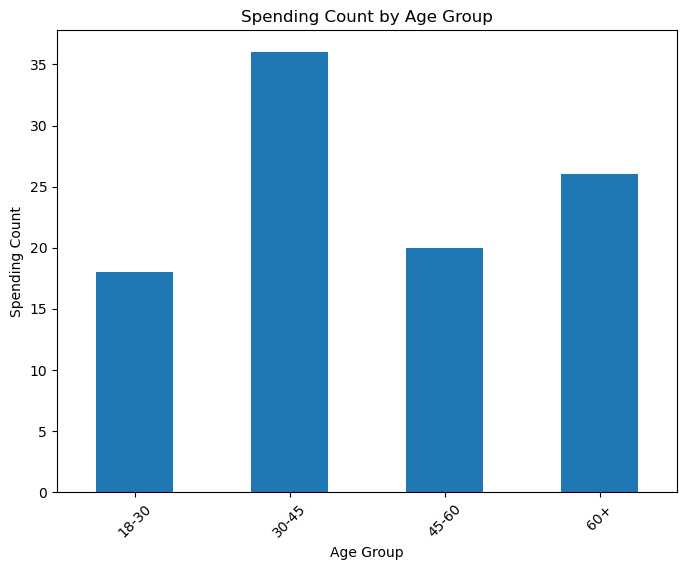

In [50]:
import matplotlib.pyplot as plt

# Create a bar plot of age group spending
plt.figure(figsize=(8, 6))
age_group_spending.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Spending Count')
plt.title('Spending Count by Age Group')
plt.xticks(rotation=45)
plt.show()

In [51]:
most_spending_age_group

'30-45'

#  Which is the most profitable segment?

In [52]:
profitable_segment = Cust_acqu.groupby('Segment')['Limit'].sum().idxmax()

In [53]:
profitable_segment

'Govt'

#  In which category the customers are spending more money?


In [54]:
category_spending = spend.groupby('Category')['Amount'].sum()
most_spending_category = category_spending.idxmax()

In [55]:
most_spending_category

'Travel'

#  Monthly profit for the bank.

In [56]:
'''monthly_profit_table = pd.DataFrame(index=months, columns=['Profit'])

for month in months:
    spend_sum = monthly_spend_table[month].sum()
    repayment_sum = monthly_repayment_table[month].sum()
    fine_sum = fine_table[month].sum()
    cashback_sum = cashback_table[month].sum()
    
    monthly_profit = repayment_sum  -spend_sum  - cashback_sum -fine_sum
    
    monthly_profit_table.loc[month, 'Profit'] = monthly_profit'''

monthly_profit_table = pd.DataFrame(index=months, columns=['Profit'])

for month in months:
    spend_sum = monthly_spend_table[month].sum()
    repayment_sum = monthly_repayment_table[month].sum()
    fine_sum = fine_table[month].sum()
    cashback_sum = cashback_table[month].sum()
    
    if repayment_sum + cashback_sum > fine_sum + spend_sum:
        profit = fine_table[month].apply(lambda x: x * 0.029 / 1.029).sum()
    else:
        profit = -1 * fine_table[month].apply(lambda x: x * 0.029 / 1.029).sum()
    
    monthly_profit_table.loc[month, 'Profit'] = profit


In [57]:
monthly_profit_table

,Profit
2004-01,-0.0
2004-02,-577723.308202
2004-03,-179315.885641
2004-04,91546.51373
2004-05,139859.166924
2004-09,82054.695624
2004-11,91544.371589
2005-01,-95829.677364
2005-02,-164964.788671
2005-04,-370686.166216


In [58]:
output_data = {
    'Task Number': ['Task 0.1','Task 0.2','Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5', 'Task 6', 'Task 7', 'Task 8', 'Task 9'],
    'Output': [Cust_acqu,
               merged_table3,
               merged_table1,
               merged_table2,
               top_customers,
               most_spending_segment,
               most_spending_age_group,
               profitable_segment,
               most_spending_category,
               monthly_profit_table,
               merged_table4]
}


In [60]:
writer = pd.ExcelWriter('required_output_project1.xlsx', engine='xlsxwriter')

In [61]:
for task_num, task_output in zip(output_data['Task Number'], output_data['Output']):
    if isinstance(task_output, pd.DataFrame):
        task_output.to_excel(writer, sheet_name=task_num, index=False)
    else:
        df = pd.DataFrame({'Output': [task_output]})
        df.to_excel(writer, sheet_name=task_num, index=False)
        

In [62]:
writer.save()

C:\Users\Anshu\AppData\Local\Temp\ipykernel_25356\934276808.py:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
